# Projeto 2 - Ciência dos Dados

Nome: Willian Kenzo Asanuma Lee

Nome: Gabriel Guimarães Parfan

Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [1]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle

In [2]:
#imports 
import pandas as pd
import pandas as pd
from emoji import UNICODE_EMOJI
import emoji_list

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [51]:
Data = pd.read_excel("samsung.xlsx")

## Limpeza de dados tirando acentos e outras coisas

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação

In [52]:
#Limpando os dados
Data['Treinamento'] = Data['Treinamento'].str.replace(',','')
Data['Treinamento'] = Data['Treinamento'].str.replace(':','')
Data['Treinamento'] = Data['Treinamento'].str.replace('|','')
Data['Treinamento'] = Data['Treinamento'].str.replace('.','')
Data['Treinamento'] = Data['Treinamento'].str.replace('"','')
Data['Treinamento'] = Data['Treinamento'].str.replace('”','')
Data['Treinamento'] = Data['Treinamento'].str.replace('“','')
Data['Treinamento'] = Data['Treinamento'].str.replace(';','')
Data['Treinamento'] = Data['Treinamento'].str.replace('!',' !')
Data['Treinamento'] = Data['Treinamento'].str.replace('?',' ?')
Data['Treinamento'] = Data['Treinamento'].str.replace('(','')
Data['Treinamento'] = Data['Treinamento'].str.replace('+','')
Data['Treinamento'] = Data['Treinamento'].str.replace(')','')
Data['Treinamento'] = Data['Treinamento'].str.replace('\n','')
Data['Treinamento'] = Data['Treinamento'].str.replace('/','') 
Data['Treinamento'] = Data['Treinamento'].str.replace('é','e')
Data['Treinamento']=  Data['Treinamento'].str.replace('ê','e')
Data['Treinamento']=  Data['Treinamento'].str.replace('á','a')
Data['Treinamento']= Data['Treinamento'].str.replace('ã','a')
Data['Treinamento']= Data['Treinamento'].str.replace('ô','o')
Data['Treinamento']= Data['Treinamento'].str.replace('ó','o')
Data['Treinamento']= Data['Treinamento'].str.replace('ú','u')
Data['Treinamento']= Data['Treinamento'].str.replace('ç','c')
Data['Treinamento']= Data['Treinamento'].str.replace('í','i')
Data['Treinamento'] = Data['Treinamento'].str.strip()
Data['Treinamento'] = Data['Treinamento'].str.lower()
emojis = emoji_list.all_emoji
for emoji in emojis:
    try:
        Data['Treinamento']= Data['Treinamento'].str.replace(emoji," {} ".format(emoji))
    except:
        pass
                                  
Data.head()


,Treinamento,Sim
0,# appleeventem paises comunistas os celulares...,0
1,ps eu nao compro mais nada da samsunge realmen...,1
2,@aeekelly sim mas faz isso tambem ! nao e so p...,0
3,@ahgaseprotect pq elas sao patrocinadas pela s...,0
4,@amandaaina 3 ta quase virando socia da samsung,0


In [53]:
lista_relevante=Data[Data.Sim==1]
lista_irrelevante=Data[Data.Sim==0]

In [54]:
lista_relevante.head()

,Treinamento,Sim
1,ps eu nao compro mais nada da samsunge realmen...,1
14,@damianizando @pcsajr rapaz eu curto muito amb...,1
15,@damianizando eu adoro a lg e tenho uma smart ...,1
16,@damianizando eu prefiro samsung mais por que ...,1
17,@damianizando tambem possuo uma smartv da lg e...,1


In [55]:
lista_irrelevante.head()

,Treinamento,Sim
0,# appleeventem paises comunistas os celulares...,0
2,@aeekelly sim mas faz isso tambem ! nao e so p...,0
3,@ahgaseprotect pq elas sao patrocinadas pela s...,0
4,@amandaaina 3 ta quase virando socia da samsung,0
5,@anacaroliiinah top samsung e o que ? to por f...,0


In [56]:
lista_relevante = list(lista_relevante['Treinamento'])

ling = ' '.join(lista_relevante)

lista_rel_limpa = pd.Series(ling.split())

In [57]:
lista_irelevante = list(lista_irrelevante['Treinamento'])

ling2 = ' '.join(lista_irelevante)

lista_irel_limpa = pd.Series(ling2.split())

In [58]:
Data.Sim.value_counts(True) * 100

1    65.0
0    35.0
Name: Sim, dtype: float64

In [59]:
p_rel= 0.65
p_irrel= 0.35

In [60]:
vc1 = lista_rel_limpa.value_counts() + 1

In [61]:
total1 = sum(vc1)
total1

5001

In [62]:
prob1 = (vc1/total1)
prob1.head()

a          0.040192
samsung    0.039392
da         0.032993
rt         0.026795
o          0.024195
dtype: float64

In [63]:
dic_rel = prob1.to_dict()
dic_rel

{'a': 0.04019196160767846,
 'samsung': 0.03939212157568486,
 'da': 0.032993401319736056,
 'rt': 0.026794641071785644,
 'o': 0.02419516096780644,
 '0': 0.02399520095980804,
 'que': 0.016196760647870425,
 '#': 0.013797240551889621,
 '!': 0.012997400519896021,
 'meu': 0.01219756048790242,
 'com': 0.011597680463907219,
 'no': 0.011397720455908818,
 'ta': 0.010597880423915218,
 '@siteptbr': 0.010397920415916816,
 'apple': 0.010397920415916816,
 'os': 0.010197960407918417,
 '1': 0.009998000399920015,
 'dos': 0.009798040391921616,
 'acontecendo': 0.009598080383923215,
 'um': 0.009398120375924815,
 'publicidade': 0.009398120375924815,
 'comentarios': 0.009398120375924815,
 'fas': 0.009398120375924815,
 'post': 0.009398120375924815,
 'pai': 0.009398120375924815,
 'respondendo': 0.009398120375924815,
 'httpstco…': 0.009198160367926415,
 'câmera': 0.008798240351929614,
 's': 0.008398320335932814,
 'design': 0.008198360327934412,
 'na': 0.007998400319936013,
 'para': 0.007998400319936013,
 'smartp

In [64]:
vc0 = lista_irel_limpa.value_counts() + 1


In [65]:
total0 = sum(vc0)
total0

3108

In [66]:
prob0 = (vc0/total0)
prob0.head()

samsung    0.030888
e          0.026062
a          0.021236
1          0.020270
0          0.018018
dtype: float64

In [67]:
dic_irel = prob0.to_dict()
dic_irel

{'samsung': 0.03088803088803089,
 'e': 0.026061776061776062,
 'a': 0.021235521235521235,
 '1': 0.02027027027027027,
 '0': 0.018018018018018018,
 'de': 0.017374517374517374,
 'que': 0.013191763191763193,
 'o': 0.01287001287001287,
 'na': 0.012548262548262547,
 '4': 0.012226512226512226,
 'da': 0.01126126126126126,
 'rt': 0.009652509652509652,
 '!': 0.009009009009009009,
 'um': 0.009009009009009009,
 '#': 0.008687258687258687,
 '2': 0.008365508365508366,
 'do': 0.008043758043758044,
 '3': 0.007722007722007722,
 'iphone': 0.006756756756756757,
 'apple': 0.006113256113256113,
 '7': 0.0054697554697554695,
 '?': 0.0054697554697554695,
 'com': 0.005148005148005148,
 'à': 0.005148005148005148,
 '9': 0.004826254826254826,
 'foi': 0.004826254826254826,
 'galaxy': 0.004826254826254826,
 '@siteptbr': 0.0045045045045045045,
 'novo': 0.0045045045045045045,
 'nao': 0.0045045045045045045,
 'comprar': 0.0045045045045045045,
 '5': 0.0045045045045045045,
 'minha': 0.0045045045045045045,
 'worten': 0.0041

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [68]:
teste = pd.read_excel('samsung.xlsx','Teste')

In [69]:
teste.head()

,Teste,Sim
0,"@1953x1986x2019 sofroooo kkkkk, pego meu samsu...",1
1,@006nego você persegue os iphones pq ele ganha...,0
2,"@006nego quero, mais esses estão bem feio no, ...",1
3,@ac_felix fazer altas fotos com câmera de ipho...,1
4,@alfe3008 @j40vi @p0linh0 beloved? em nenhum m...,0


In [70]:
teste['Teste'] = teste['Teste'].str.replace(',','')
teste['Teste'] = teste['Teste'].str.replace(':','')
teste['Teste'] = teste['Teste'].str.replace('|','')
teste['Teste'] = teste['Teste'].str.replace('.','')
teste['Teste'] = teste['Teste'].str.replace('"','')
teste['Teste'] = teste['Teste'].str.replace('”','')
teste['Teste'] = teste['Teste'].str.replace('“','')
teste['Teste'] = teste['Teste'].str.replace(';','')
teste['Teste'] = teste['Teste'].str.replace('!',' !')
teste['Teste'] = teste['Teste'].str.replace('?',' ?')
teste['Teste'] = teste['Teste'].str.replace('(','')
teste['Teste'] = teste['Teste'].str.replace('+','')
teste['Teste'] = teste['Teste'].str.replace(')','')
teste['Teste'] = teste['Teste'].str.replace('\n','')
teste['Teste'] = teste['Teste'].str.replace('/','') #
teste['Teste'] = teste['Teste'].str.replace('é','e')
teste['Teste']= teste['Teste'].str.replace('ê','e')
teste['Teste']= teste['Teste'].str.replace('á','a')
teste['Teste']= teste['Teste'].str.replace('ã','a')
teste['Teste']= teste['Teste'].str.replace('ô','o')
teste['Teste']= teste['Teste'].str.replace('ó','o')
teste['Teste']= teste['Teste'].str.replace('ú','u')
teste['Teste']= teste['Teste'].str.replace('ç','c')
teste['Teste']=teste['Teste'].str.replace('í','i')
emojis = emoji_list.all_emoji
for emoji in emojis:
    try:
        teste['Teste']=teste['Teste'].str.replace(emoji," {} ".format(emoji))
    except:
        pass
teste['Teste'] = teste['Teste'].str.strip()
teste['Teste'] = teste['Teste'].str.lower()

### Formula Laplace Smoothing
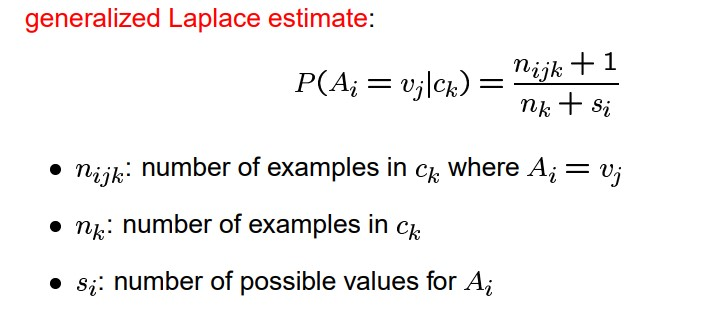

http://www.cs.toronto.edu/~bonner/courses/2007s/csc411/lectures/03bayes.zemel.pdf


In [71]:
vazia = []



def naiveBayes(df):

    tweet = i.split()

    a = 1
    b = 1

    for palavra in tweet:
        
        if palavra not in dic_rel:#LaPlace smoothing
            a *= 1/(total0 + total1)
        else:
            a *= dic_rel[palavra]

        if palavra not in dic_irel:#laPlace smoothing
            b *= 1/(total0 + total1)
        else:
            b *= dic_irel[palavra]


    a1 = a * p_rel
    b1 = b * p_irrel

    if a1 > b1:
        return 1
    else:
        return 0
    
for i in teste.Teste:
    vazia.append(naiveBayes(teste.Teste))

In [72]:
teste['Verif'] = vazia
teste.head()

,Teste,Sim,Verif
0,@ 1 9 5 3 x 1 9 8 6 x 2 0 1 9 sofroo...,1,0
1,@ 0 0 6 nego voce persegue os iphones pq ele...,0,0
2,@ 0 0 6 nego quero mais esses estao bem feio...,1,1
3,@ac_felix fazer altas fotos com câmera de ipho...,1,1
4,@alfe 3 0 0 8 @j 4 0 vi @p 0 linh 0 belo...,0,1


In [80]:
soma_pp = 0
soma_nn = 0
soma_pn = 0
soma_np = 0

lista_resultado = []

for index in range(0,200):
    if teste['Sim'][index] == 1:
        if teste['Verif'][index] == 1:
            lista_resultado.append('Positivo Verdadeiro')
            soma_pp += 1
        else:
            lista_resultado.append('Positivo Falso')
            soma_pn += 1
    elif teste['Sim'][index] == 0:
        if teste['Verif'][index] == 1:
            lista_resultado.append('Negativo Falso')
            soma_np += 1
        else:
            lista_resultado.append('Negativo Verdadeiro')
            soma_nn += 1
            
teste['Resultado']=lista_resultado    

print('++ : {0}'.format(soma_pp))
print('-- : {0}'.format(soma_nn))
print('+- : {0}'.format(soma_pn))
print('-+ : {0}'.format(soma_np))

++ : 92
-- : 50
+- : 21
-+ : 37


In [81]:
teste.head()

,Teste,Sim,Verif,Resultado
0,@ 1 9 5 3 x 1 9 8 6 x 2 0 1 9 sofroo...,1,0,Positivo Falso
1,@ 0 0 6 nego voce persegue os iphones pq ele...,0,0,Negativo Verdadeiro
2,@ 0 0 6 nego quero mais esses estao bem feio...,1,1,Positivo Verdadeiro
3,@ac_felix fazer altas fotos com câmera de ipho...,1,1,Positivo Verdadeiro
4,@alfe 3 0 0 8 @j 4 0 vi @p 0 linh 0 belo...,0,1,Negativo Falso


In [82]:
PPpercent = (soma_pp / 200) * 100
NNpercent = (soma_nn / 200) * 100
PNpercent = (soma_pn / 200) * 100
NPpercent = (soma_np / 200) * 100

In [83]:
print(PPpercent)
print(NNpercent)
print(PNpercent)
print(NPpercent)

46.0
25.0
10.5
18.5


In [84]:
print(teste["Resultado"].value_counts(normalize=True)*100)


Positivo Verdadeiro    46.0
Negativo Verdadeiro    25.0
Negativo Falso         18.5
Positivo Falso         10.5
Name: Resultado, dtype: float64


___
### Concluindo


A partir dos resultados obtidos, oberva-se que 92 resultados foram classificados como Positivo Verdadeiro, representando 46% dos tweets, e que 50 foram classificados como Negativo Verdadeiro, representando 25%, logo 71% dos tweets classificados foram comparados corretamente. Observando os Positivo Falso e Negativo Falso, obtêm-se, respectivamente, 21 retweets (10.5%) e 37 retweets (18.5%). Com base nesses números, conclui-se que o classificador conquistou resultados significativos com quase três quartos de todos os tweets avaliados. Isso se deve ao fato da base de dados utilizada não possuir dados suficientes para uma avaliação mais abrangente do classificador, além disso uma quantidade de /rt considerável também impactou na qualidade do classificador.

Uma outra justificativa é o fato de o classificador não levar em conta as duplas negações e sarcasmos das pessoas ao realizar algumas de suas postagens, classificando, na maior parte das vezes, como tweets irrelevantes, o que interfere na avaliação do programa, já que, na base de dados utilizada, os tweets negativos eram em sua maioria irrelevantes, aumentando a taxa dos tweets irrelevantes classificados.


## Proposta
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto


O classificador Naive-Bayes é extremamente útil, podendo ser utilizados em diferentes cenários, com o objetivo de  agilizar e otimizar projetos, como por exemplo: deteccção de email, e os classificando como spam ou não, e em um diagnóstico médico onde existe claramente duas classes possíveis, como em um dos exemplos de sala(teste de gravidez), um desses exemplos de diagnóstico é o de H1N1, onde o paciente pode ter ou não ter, tal doença

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

http://www.cs.toronto.edu/~bonner/courses/2007s/csc411/lectures/03bayes.zemel.pdf

https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used
